## Student's t-Distribution and t-Test


- https://en.wikipedia.org/wiki/Student%27s_t-test
- https://en.wikipedia.org/wiki/Student%27s_t-distribution    
- https://en.wikipedia.org/wiki/William_Sealy_Gosset

t-Distribution and t-Test were developed and published in 1908 by William Sealy Gosset (1876 - 1937).<br>
He used pseudonym "Student" because his employer didn't allow him to publish under his real name.<br>
Gosset was working for Guinness Beer Company in England. His position was "Head Experimental Brewer".<br>
He was working on cultivating barley.<br>
He had few data points, and developed his t-distribution and t-test to handle these situations (less than 30 points).<br>
<br>
Gosset has spent two terms in 1906–1907 in the Biometrics laboratory of Karl Pearson. Pearson helped Gosset with the mathematics of his papers, including the 1908 papers.<br>
<br>
If you have bell-shaped distribution based on many points, you usually  can calculate the standard error with good precision, and approximate your distribution using Gaussian Normal distribution.<br>
<br>
But if you have a small number of points (only 5-30) - then you can not estimate the error very well. Then you should use t-distribution instead of the Normal.<br>
t-distribution is similar to Normal, but it has "fatter" tails to account for uncertainty in the standard error.<br>
As the number of data points gets to 30 or larger, you can safely switch from t-distribution to Normal Gaussian distribution (at approximately 30 points).<br>

Sample Mean:
$$ \mu = \frac{\displaystyle\sum_{i=1}^{n}x_i^2} {n} $$

Sample Variance: 
$$ S^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n-1} $$

In [1]:
import sys,os
import pandas as pd
import numpy as np

from scipy import stats
import math

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


Compare Normal distribution (blue)
with t-Distributions (orange)
at different df (degrees of freedom).
Note that at 30+ points t-distribution
practically converges to Normal



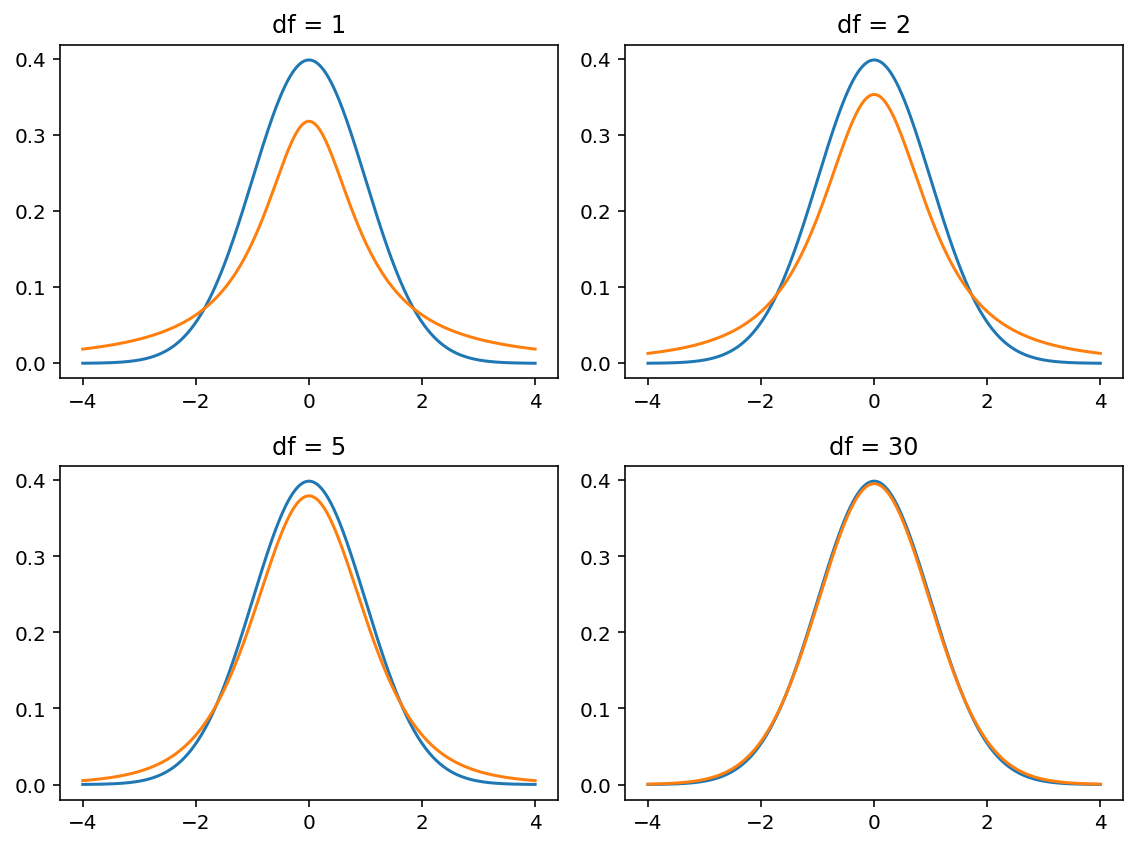

In [2]:
# compare t-Distribution with Normal distribution

x = np.arange(-4,4,0.001)
nn   = stats.norm.pdf(x)
yy1  = stats.t.pdf(x,1)
yy2  = stats.t.pdf(x,2)
yy5  = stats.t.pdf(x,5)
yy30 = stats.t.pdf(x,30)

print("""
Compare Normal distribution (blue)
with t-Distributions (orange)
at different df (degrees of freedom).
Note that at 30+ points t-distribution
practically converges to Normal
""")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
ax0, ax1, ax2, ax3 = axes.flatten()
_ = ax0.plot(x,nn)
_ = ax0.plot(x,yy1)
_ = ax0.set_title('df = 1')

_ = ax1.plot(x,nn)
_ = ax1.plot(x,yy2)
_ = ax1.set_title('df = 2')

_ = ax2.plot(x,nn)
_ = ax2.plot(x,yy5)
_ = ax2.set_title('df = 5')

_ = ax3.plot(x,nn)
_ = ax3.plot(x,yy30)
_ = ax3.set_title('df = 30')

fig.tight_layout()
plt.show() ;


In [3]:
# one-sample t-test - find out if the sample mean 
# is statistically different from a proposed value
#
# Null Hypothesis: mean(data) == proposed_mean

def one_sample_ttest(data1, proposed_mean, alpha=0.05):
    """ calculate one-sample t-test """
    # calculate means
    mean1 = np.mean(data1)
    # calculate standard errors
    sed = stats.sem(data1)
    # calculate the t statistic
    t_stat = (mean1 - proposed_mean) / sed
    # degrees of freedom
    df = len(data1) - 1
    # calculate the critical value - a point on test distribution
    # that is compared to the test statistic 
    # to determine whether to reject the null hypothesis. 
    # You reject null hypothesis when abs(t_stat) > cv
    cv = stats.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [4]:
np.random.seed(1)
data1 = 5 * np.random.randn(100) + 50
proposed_mean = 52
alpha = 0.05
print(f"data1_mean = {np.mean(data1):.4f}")

t_stat, df, crit_val, p_val = one_sample_ttest(data1, proposed_mean, alpha)
print(f"t_stat       = {t_stat:.4f}")
print(f"degr.freedom = {df}")
print(f"crit_val     = {crit_val:.4f}")
print(f"p_val        = {p_val:.4f}")

print("\nNull Hypothesis: two means are equal")
print("reject if abs(t_stat) > crit_val :", end="")
if abs(t_stat) > crit_val:
    print("  Reject")
else:
    print("  Accept")
    
print("reject if p_val      <= alpha    :", end="")
if p_val < alpha:
    print("  Reject")
else:
    print("  Accept")

data1_mean = 50.3029
t_stat       = -3.8153
degr.freedom = 99
crit_val     = 1.6604
p_val        = 0.0002

Null Hypothesis: two means are equal
reject if abs(t_stat) > crit_val :  Reject
reject if p_val      <= alpha    :  Reject


In [5]:
# two-sample t-test (a.k.a. Independent Samples t Test)
# compares the means of two independent groups
# in order to determine whether there is statistical evidence
# that their mean values are significantly different.
#
# https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
#
# We have two data arrays.
# Null Hypothesis - the two means are equal

def independent_ttest(data1, data2, alpha=0.05):
    """ calculate t-test for two independent variables """
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = stats.sem(data1), stats.sem(data2) # ScyPy
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value - a point on test distribution
    # that is compared to the test statistic 
    # to determine whether to reject the null hypothesis. 
    # You reject null hypothesis when abs(t_stat) > cv
    cv = stats.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [6]:
np.random.seed(1)
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51
alpha = 0.05
print(np.mean(data1))
print(np.mean(data2))

50.30291426037849
51.763973888101


In [7]:
t_stat, df, crit_val, p_val = independent_ttest(data1, data2, alpha)
print(f"t_stat       = {t_stat:.4f}")
print(f"degr.freedom = {df}")
print(f"crit_val     = {crit_val:.4f}")
print(f"p_val        = {p_val:.4f}")

# ------------------------------------------------
print("\nNull Hypothesis: two means are equal")
print("reject if abs(t_stat) > crit_val :", end="")
if abs(t_stat) > crit_val:
    print("  Reject")
else:
    print("  Accept")
print("reject if p_val      <= alpha    :", end="")
if p_val < alpha:
    print("  Reject")
else:
    print("  Accept")

t_stat       = -2.2620
degr.freedom = 198
crit_val     = 1.6526
p_val        = 0.0248

Null Hypothesis: two means are equal
reject if abs(t_stat) > crit_val :  Reject
reject if p_val      <= alpha    :  Reject


In [8]:
# paired t-test (for dependent samples)
# https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
# 
# collect some observations on a sample from the population
# then apply some treatment
# then collect observations from the same sample

# t-test for dependent samples
from numpy.random import randn
from scipy.stats import t
 
# function for calculating the t-test for two dependent samples
def dependent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # number of paired samples
    n = len(data1)
    # sum squared difference between observations
    d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
    # sum difference between observations
    d2 = sum([data1[i]-data2[i] for i in range(n)])
    # standard deviation of the difference between means
    sd = math.sqrt((d1 - (d2**2 / n)) / (n - 1))
    # standard error of the difference between the means
    sed = sd / math.sqrt(n)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [9]:
# seed the random number generator
np.random.seed(1)
# generate two independent samples (pretend they are dependent)
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51

# calculate the t test
alpha = 0.05

t_stat, df, crit_val, p_val = dependent_ttest(data1, data2, alpha)

print(f"t_stat       = {t_stat:.4f}")
print(f"degr.freedom = {df}")
print(f"crit_val     = {crit_val:.4f}")
print(f"p_val        = {p_val:.4f}")

# ------------------------------------------------
print("\nNull Hypothesis: two means are equal")
print("reject if abs(t_stat) > crit_val :", end="")
if abs(t_stat) > crit_val:
    print("  Reject")
else:
    print("  Accept")
print("reject if p_val      <= alpha    :", end="")
if p_val < alpha:
    print("  Reject")
else:
    print("  Accept")

t_stat       = -2.3719
degr.freedom = 99
crit_val     = 1.6604
p_val        = 0.0196

Null Hypothesis: two means are equal
reject if abs(t_stat) > crit_val :  Reject
reject if p_val      <= alpha    :  Reject


In [10]:
# t-test for two groups which are not normally distributed.

# https://www.researchgate.net/post/What-are-some-useful-techniques-to-statistically-compare-exponentially-distributed-data

# Approach - approximate data with some distribution.
# For example, Poisson can be used if data = counts of website visits.
# Then we compare mean values (lambda) between groups.
# Example - you approximate data using exponential distribution
# Sometimes data can be approximated by exponent
# Then a log based transformation followed by a goodness of fit test 
# (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling or Cramér-von Mises)

# If your observed x are well away from zero, then a normal approximation may be feasible.

# If the sample size is big enough (>30), then the distribution of mean values
# tend to Normal and you can use regular parametric tests, like ANOVA.

# non-parametric tests:
#   Mann-Whitney (for two groups) 
#   Kruskal-Wallis test (for three or more groups)
# 
# -------------------------------------------------
# A/B Test Significance in Python
#   https://cosmiccoding.com.au/tutorials/ab_tests
# AB Testing With Python
#   https://www.kaggle.com/tammyrotem/ab-tests-with-python
